In [34]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline

## Team
Tymur Krasnianskyi, Nazar Demchuk, Serhii Matsyshyn

## Intro

1. Submit this task as a link to your team's Google Colab (https://colab.research.google.com/notebooks/intro.ipynb#). Make sure you made a copy of this notebook and opened it via UCU email address.

2. Please use cv2 standard methods for reading and resizing the images, and matplotlib or cv2 imshow function for displaying it.

3. There should be only one submission per team. However, don't forget to choose a person from your team who would submit the task, and **make sure that the names of all team members are listed in the notebook**. Teammates not mentioned in the notebook will not be graded for this lab.   

4. Your final grade will be a product of grade for the coding and explanatory part and coefficient for the oral defense (will be announced later). Please note that your final mark for this assignment will consist of three components:
  *   Coding part
  *   Explanations
  *   Oral defense (to be scheduled later)

  Make sure you include detailed theoretical explanations where necessary.

5. **Important**: during the implementation, you are welcomed to use `cv2` methods, but you must also implement the transformation matrices yourself (except image **reading**, **recizing** and **displaying**). Finally, as a successful result, you can demonstrate that the outputs of both approaches coincide!




## 1.

Recall that a linear transformation is a mapping $T: \mathbb{R}^n \rightarrow \mathbb{R}^m$ such that
$\forall c_1, c_2 \in \mathbb{R}, \mathbf{u}_1, \mathbf{u}_2 \in \mathbb{R}^n$  
$T(c_1 \mathbf{u}_1 + c_2 \mathbf{u}_2) = c_1T(\mathbf{u}_1) + c_2T(\mathbf{u}_2)$.  

In this lab you will study some of the common transformations in $\mathbb{R}^2$, derive their general matrix form, explain what a resulting image will look like and apply transformations to the vectors and pictures.

Each linear transformation can be represented as a matrix. In case of an image linear transformation is applied to a pixel position on xy-plane, transforming its coordinates $(x, y)$ to $(x', y')$ but retaining the color. However, the image is usually represented as an array of pixels, thus having the dimension (image height, image width, 3) if the color is represented in RGB system. You can use *warpAffine()* function from cv2 to perform transformations on the image, or you can implement a function that manipulates each pixel's position given an array of pixels and calculate the transformation matrix on your own.

### 1.1 Image preparation

First, load image 1, resize it to a more convenient form, and examine its representation.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The shape of the image is (500, 500, 3)


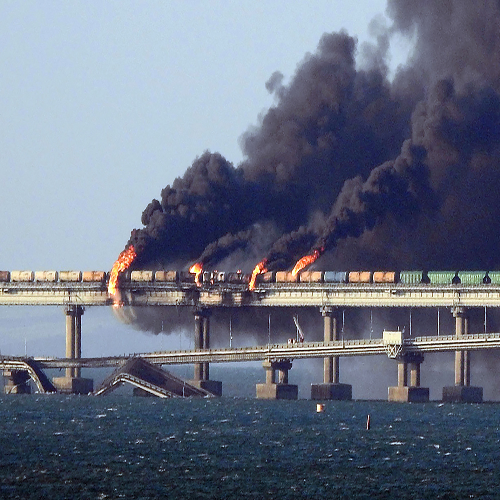

In [35]:
# Load images

##### YOUR CODE STARTS #####
drive.mount('/content/drive')
img1_path = '/content/drive/MyDrive/Media/Photos/img1.jpg'
image = cv.imread(img1_path)
resized = cv.resize(image, (500,500))

print(f"The shape of the image is {resized.shape}")
cv2_imshow(resized)

##### YOUR CODE ENDS ##### 

 What is this image's shape? What do the values mean?

The resized image has a shape of (500, 500, 3), where the first two values represent the height and width of the image in pixels, and the third value represents the number of color channels. In this case, the image is a color image, so it has 3 color channels (red, green, and blue).

### 1.2 Rotation matrix

Rotation is a linear transformation of some space that preserves at least one point. An example of rotation by angle $\psi$ on xy-plane is depicted on the image below:   
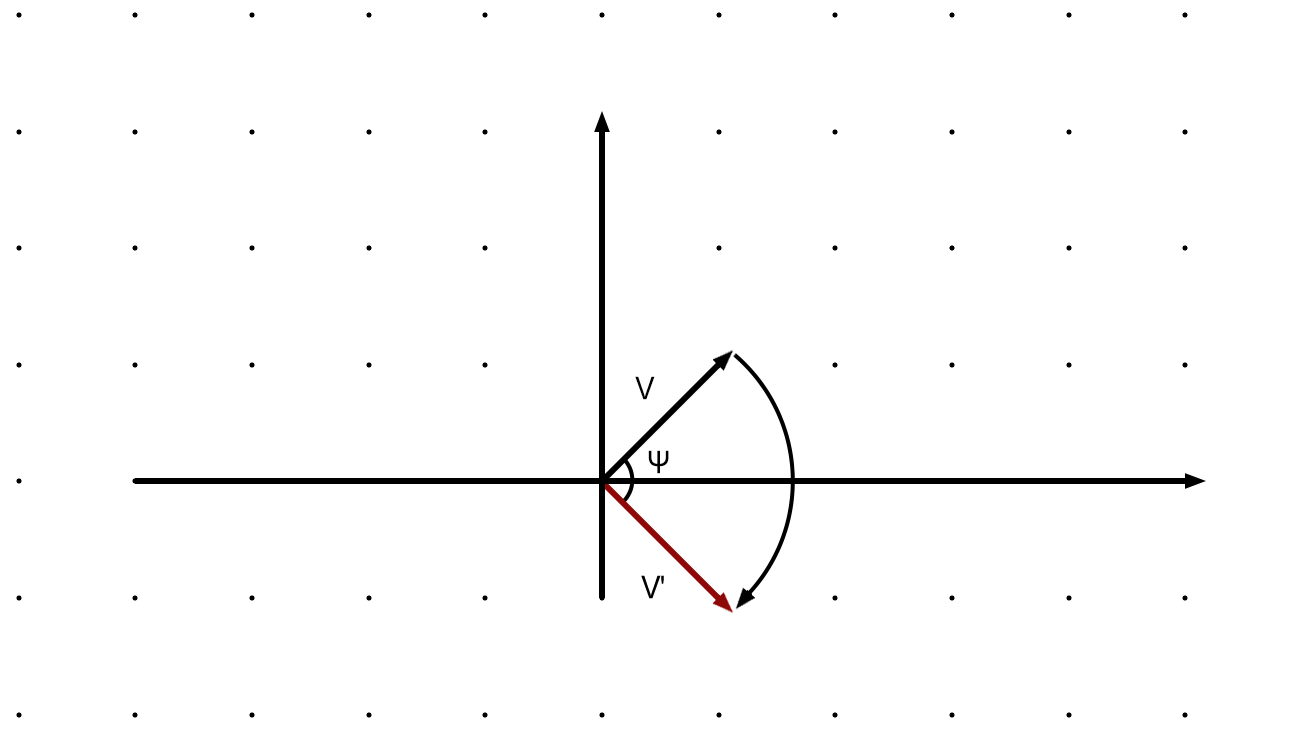

What is the transformation matrix that corresponds to rotation by a generic angle $\phi$?

$M =
 \begin{pmatrix}
  0 & 1 \\
  -1 & 0 \\
 \end{pmatrix}$

Your next task is to implement a function that calculates the rotation matrix and apply it to a vector and to an image to rotate them by $45^\circ$.
First, construct the rotation matrix:

In [36]:
# Create rotation matrix

def get_rotation_matrix(phi):
    phi = np.deg2rad(phi)
    cos_phi = np.cos(phi)
    sin_phi = np.sin(phi)
    transformation_matrix = np.array([[cos_phi, -sin_phi], [sin_phi, cos_phi]])
    return transformation_matrix

phi = 45
M = get_rotation_matrix(phi)
print("Rotation matrix is")
print(M)

Rotation matrix is
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Second, we'll apply the transformation to a vector. Let's check what our vector looks like now:


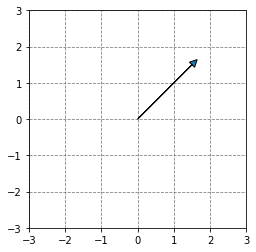

In [37]:
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

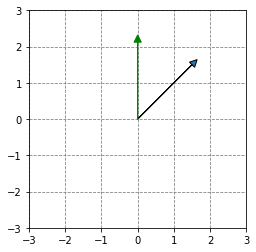

In [38]:
# Apply rotation to the vector AB1 to get vector AB2

##### YOUR CODE STARTS #####
# Apply transformation to vector
A = np.array([0, 0])
B1 = np.array([1.5, 1.5])
B2 = np.dot(M, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

You can also rotate images! Check how below:

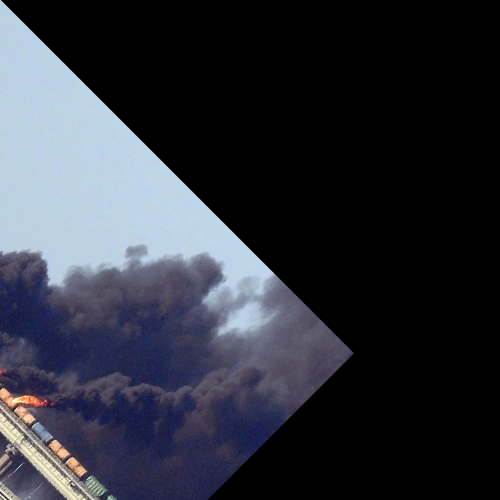

In [39]:
##### YOUR CODE STARTS #####
# Read image
img = cv.imread(img1_path)
img = cv.resize(img, (500,500))

# Define rotation angle
angle = 45

# Get rotation matrix
M = get_rotation_matrix(angle)

# Apply rotation to image
rotated = cv.warpAffine(img, np.column_stack((M, [0., 0.])), (500, 500), flags=cv.INTER_LINEAR, borderMode=cv.BORDER_CONSTANT)

##### YOUR CODE ENDS #####

cv2_imshow(rotated)

### 1.3 Scaling matrix

Scaling is a tranformation that enlarges or diminishes objects by a factor. For scaling in 2D space a factor can be represented as a vector $(x_s, y_s)$ where $x_s$ and $y_s$ are scaling factors for each respective axis (those factors don't have to be equal). On the picture below, V' represents vector V scaled by a factor (0.5, 1) and V'' - by (0.5, 0.5).
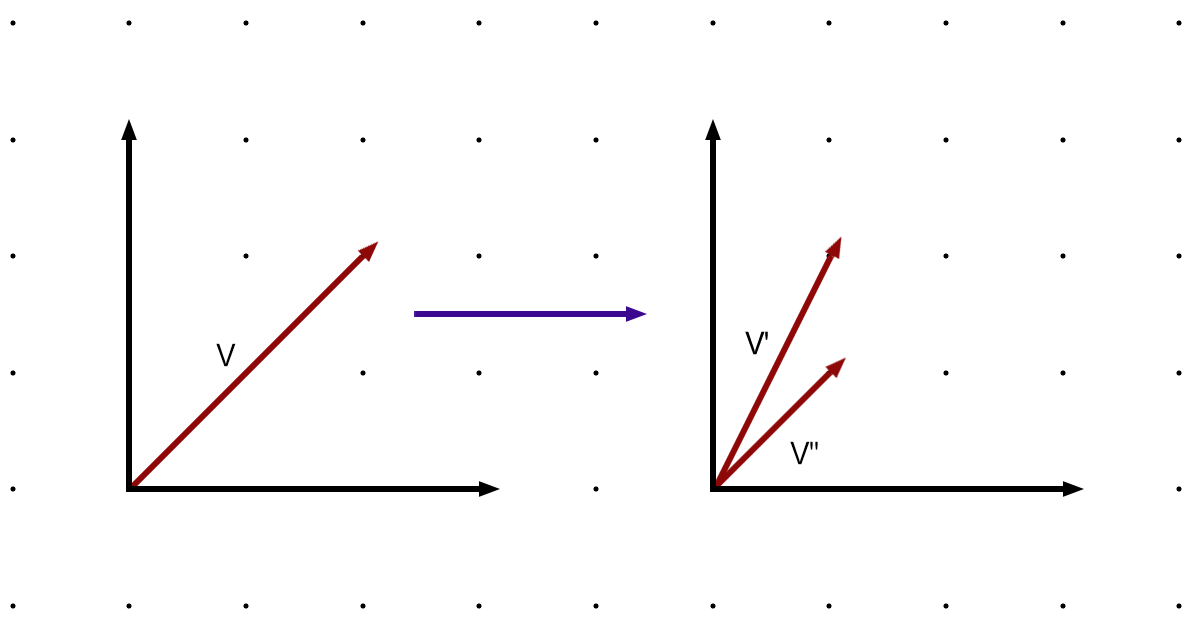

In this part, you should derive a general form for a scaling matrix and apply scaling by a factor of (1, 0.5) to the vector and the image. First, explain how you derive the scaling matrix:

The scaling matrix is a 2x2 matrix that represents the transformation of a vector in 2D space using scaling factors xs and ys.  

The matrix can be derived as follows:  
Let V = (x, y) be a vector in 2D space, and (xs, ys) be the scaling factors for each respective axis.  
  
The scaling transformation can be represented as follows:

V' = (xsx, ysy)

This can be written as a matrix multiplication:

|xs 0 | * |x| = |xsx|  
|0 ys| * |y| = |ysy|

Therefore, the scaling matrix is:

$
\begin{pmatrix}
  xs & 0 \\
  0 & ys \\
 \end{pmatrix}
 $

In [40]:
##### YOUR CODE STARTS #####
def get_scaling_matrix(scale_factor_x, scale_factor_y):
  return np.array([[scale_factor_x, 0], [0, scale_factor_y]])

M2 = get_scaling_matrix(1, 0.5)

##### YOUR CODE ENDS #####
print("Scaling matrix is")
print(M2)

Scaling matrix is
[[1.  0. ]
 [0.  0.5]]


Second, apply scaling by (1, 0.5) to the vector.

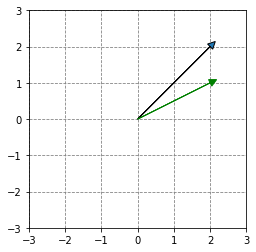

In [41]:
# Apply scaling to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([2, 2])
B2 = np.dot(M2, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Now, apply scaling by the same factor to the image:

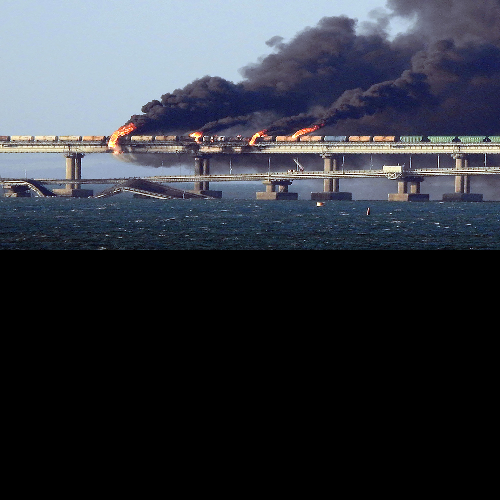

In [42]:
##### YOUR CODE STARTS #####
def get_scaling_matrix_3d(scale_factor_x, scale_factor_y):
  return np.column_stack((get_scaling_matrix(scale_factor_x, scale_factor_y), [0., 0.]))

# Read image
img = cv.imread(img1_path)
img = cv.resize(img, (500,500))

rows, cols, channels = img.shape
scaled = cv.warpAffine(img, get_scaling_matrix_3d(1, 0.5), (cols, rows))
##### YOUR CODE ENDS #####
cv2_imshow(scaled)

### 1.4 Shear matrix

Horizontal shearing moves each point in a fixed direction by distance proportional to y-coordinate of the point. Shear map changes angles and lengths of line segments.

In this part, you needs to build a shearing matrix, find a transformation matrix that moves the point $(x, y)$ to $(x+1.5y, y)$, and apply it to the vector and the image. First, explain how do you build a matrix that corresponds to a shearing transformation:

To build a matrix that corresponds to a shearing transformation, we can use the following approach:

Decide which axis we want to shear along. Let's say we want to shear along the x-axis.
Choose a fixed direction in which we want to shear the points. For example, we might want to shear each point by a distance proportional to its y-coordinate.
Define a shear parameter (usually denoted by s) that determines the amount of shear. This parameter controls the proportionality constant between the distance sheared and the y-coordinate of the point.
Construct a matrix that applies the desired shear transformation.
For horizontal shearing, the matrix that corresponds to the transformation of moving each point in a fixed direction by a distance proportional to its y-coordinate is given by:

$S =
 \begin{pmatrix}
  1 & s \\
  0 & 1 \\
 \end{pmatrix}$

where s is the shear parameter. To shear each point by a distance proportional to its y-coordinate, we can set s equal to some multiple of the y-coordinate.

For example, to transform the point (x, y) to (x + 1.5y, y), we can set s = 1.5 and construct the shear matrix as follows:

$S =
 \begin{pmatrix}
  1 & 1.5 \\
  0 & 1 \\
 \end{pmatrix}$

To apply this shear transformation to a vector or an image, we can simply multiply each point's coordinates by the shear matrix. For example, to apply the transformation to a point (x, y), we can compute:

$S * 
 \begin{pmatrix}
  x\\
  y\\
 \end{pmatrix} =
 \begin{pmatrix}
  x+1.5y \\
  y \\
 \end{pmatrix}$


Second, implement a function for constructing such a matrix:

In [43]:
##### YOUR CODE STARTS #####
def get_horizontal_shear_matrix(factor: float):
    return np.array([[1., factor],
                     [0., 1.]])

M3 = get_horizontal_shear_matrix(1.5)
##### YOUR CODE ENDS #####
print("Shearing matrix is")
print(M3)

Shearing matrix is
[[1.  1.5]
 [0.  1. ]]


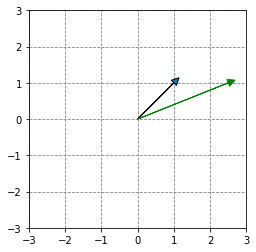

In [44]:
# Apply shearing to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([1, 1])
B2 = np.dot(M3, B1)
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply this shearing transformation to the image. 

[[1.  1.5 0. ]
 [0.  1.  0. ]]


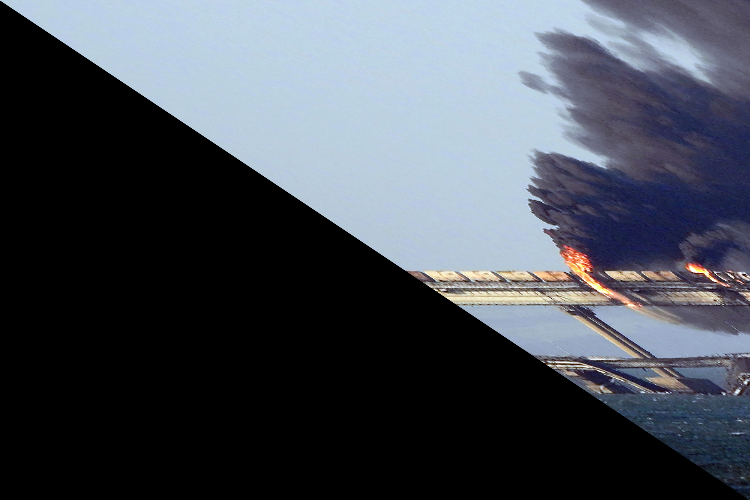

In [45]:
##### YOUR CODE STARTS #####
img = cv.imread(img1_path)
img = cv.resize(img, (750,500))

# Define shearing matrix
shear_factor = 1.5

# Add a column to fit cv.warpAffine param requirements.
M_shear = np.column_stack((get_horizontal_shear_matrix(shear_factor), [0., 0.]))
print(M_shear)

# Apply shearing transformation to the image
rows, cols = img.shape[:2]
sheared = cv.warpAffine(img, M_shear, (cols, rows))
##### YOUR CODE ENDS #####
cv2_imshow(sheared)

### 1.5 Translation matrix

Translation is a transformation that moves every point of a figure by a fixed distance.


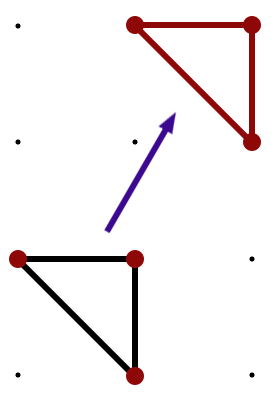

Here, you should build a translation matrix and apply translation by $(20, 25)$ to the vector and to the image. Start from explaining how to construct a translation matrix:

To construct a translation matrix, we can start with an identity matrix, and then modify the last column to represent the translation factor.  
For example, for a translation by (tx, ty), the translation matrix T is:

$T = 
\begin{pmatrix}
  1 & 0 & tx \\
  0 & 1 & ty \\
  0 & 0 & 1 \\
 \end{pmatrix}
 $

To apply this transformation to a 2D point (x, y), we can represent the point as a homogeneous coordinate vector (x', y', 1) and then multiply it with the translation matrix T to obtain the transformed vector (x'' , y'', 1), where x'' = x + tx and y'' = y + ty.

Then, implement a function that produces such a matrix:

In [46]:
##### YOUR CODE STARTS #####
def get_translation_matrix(translation_factor_x, translation_factor_y):
  return np.array([
      [1., 0., translation_factor_x],
      [0., 1., translation_factor_y],
      [0., 0., 1.]
      ])

M4 = get_translation_matrix(20, 25)
##### YOUR CODE ENDS #####
print("Translation matrix is")
print(M4)

Translation matrix is
[[ 1.  0. 20.]
 [ 0.  1. 25.]
 [ 0.  0.  1.]]


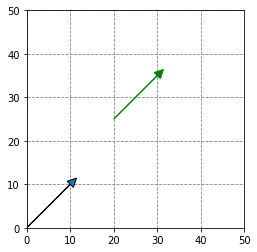

In [47]:
# Apply translation to the vector A1B1 to achieve vector A2B2

##### YOUR CODE STARTS #####
A1 = np.array([0, 0])
B1 = np.array([10, 10])

A1_3 = np.append(A1, [1])
B1_3 = np.append(B1, [1])

A2 = np.matmul(M4, A1_3)[:2]
B2 = np.matmul(M4, B1_3)[:2]
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A1[0], A1[1], B1[0], B1[1], head_width=2, head_length=2)
ax.arrow(A2[0], A2[1], B2[0]-A2[0], B2[1]-A2[1], head_width=2, head_length=2, color='green')
plt.ylim(0,50)
plt.xlim(0,50)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

Finally, apply the translation by $(20, 25)$ to the image.

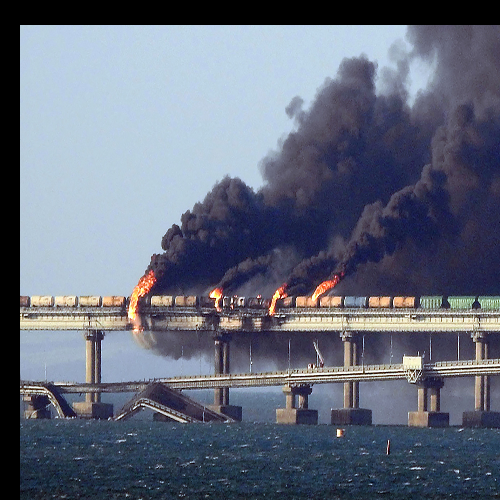

In [48]:
##### YOUR CODE STARTS #####
img = cv.imread(img1_path)
img = cv.resize(img, (500,500))

translated = cv.warpAffine(img, M4[:2], (500, 500))
##### YOUR CODE ENDS #####
cv2_imshow(translated)

### 1.6 Mirror symmetry 
Vertical mirror symmetry maps coordinates $(x, y)$ to $(-x,y)$.

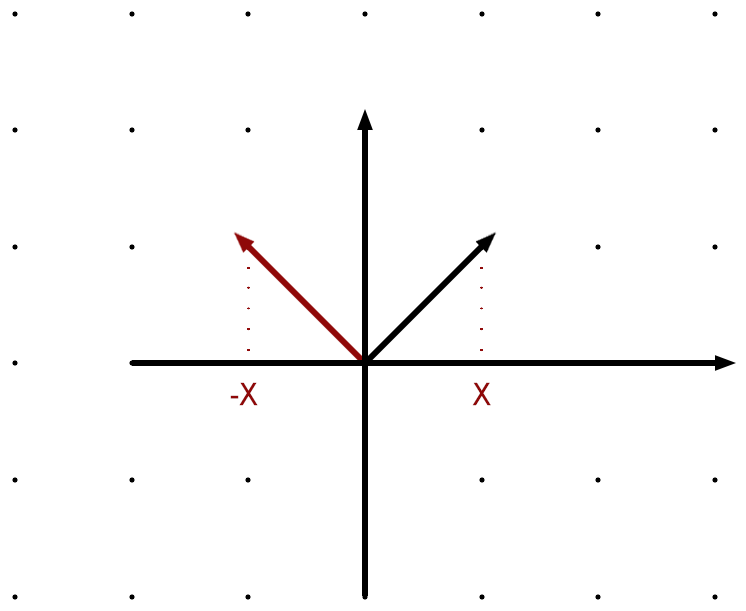

As in the previous parts, you need to provide the expanation, implement a function that produces a vertical symmetry matrix, and apply it to the vector and to the image.

A vertical symmetry or reflection is a transformation that flips the points of a figure or image across a vertical line. To build a matrix that corresponds to a vertical symmetry transformation, we need to reflect each point of the figure or image across a vertical line. If we assume that the vertical line is the y-axis, we can build a matrix by multiplying each point's x-coordinate by -1. The resulting matrix will reflect the figure or image across the y-axis.

In [49]:
##### YOUR CODE STARTS #####
def get_vertical_symmetry_matrix():
  return np.array([[-1., 0., 0.],
                     [0., 1., 0.],
                     [0., 0., 1.]])

M5 = get_vertical_symmetry_matrix()
##### YOUR CODE ENDS #####
print("Mirroring matrix is")
print(M5)

Mirroring matrix is
[[-1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


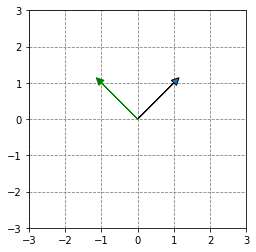

In [50]:
# Apply mirroring to the vector AB1 to achieve vector AB2

##### YOUR CODE STARTS #####
A = np.array([0, 0])
B1 = np.array([1, 1])
B2 = np.dot(M5, np.append(B1, 1))[:2]
##### YOUR CODE ENDS #####

ax = plt.axes()

ax.arrow(A[0], A[1], B1[0], B1[1], head_width=0.2, head_length=0.2)
ax.arrow(A[0], A[1], B2[0], B2[1], head_width=0.2, head_length=0.2, color='green')
plt.ylim(-3,3)
plt.xlim(-3,3)

ax.set_axisbelow(True)
plt.grid(color='gray', linestyle='dashed')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

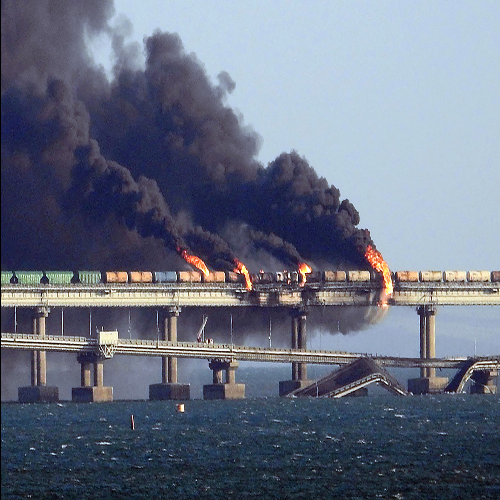

In [51]:
##### YOUR CODE STARTS #####
img = cv.imread(img1_path)
img = cv.resize(img, (500, 500))

height, width = img.shape[:2]

# Create horizontal flip matrix
M5 = get_vertical_symmetry_matrix()

# Delete the last row to match cv.warpAffine param requirements.
M5_upd = np.delete(M5, 2, axis=0)
# show the symmetry line
M5_upd[0, 2] = width

# Apply horizontal flip to image
mirrored = cv.warpAffine(img, M5_upd, (width, height))
##### YOUR CODE ENDS #####
cv2_imshow(mirrored)

## 2.

### 2.1 Perspective shift matrix

You will need to use img2.jpg for this task. Load and resize it using the same commands you used for preparing img1.

The main goal of perspective transformation (or perspective rectification) is to synthesize a perspective-free view of an object given a photo taken at an angle.   

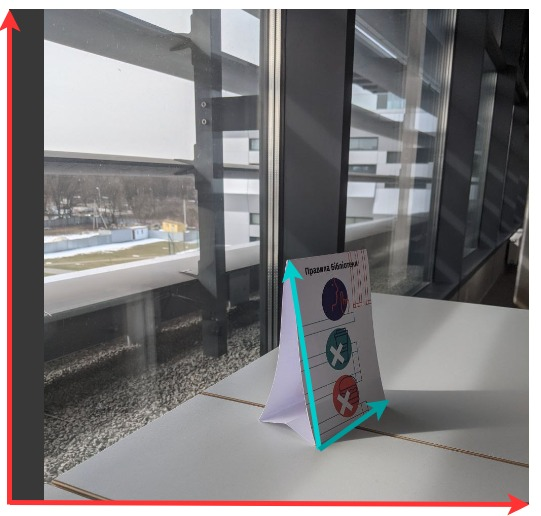

As you see on the picture above, the initial picture has a standard basis of red vectors. We want to transform all of the vectors in the picture so that the blue vectors will become the new basis.

To find this transformation matrix, you need to choose 4 points on the input image and corresponding points on the output image (3 of these points should not be collinear). In this case, the transformation matrix is a 3 by 3 matrix that satisfies the following equation, where ($x_i$, $y_i$) is the source vector and ($u_i$, $v_i$) is  the destination vector:

$u_i = \dfrac{c_{00}*x_i + c_{01}*y_i + c_{02}}{ c_{20}*x_i + c_{21}*y_i + c_{22}}$

$v_i = \dfrac{c_{10}*x_i + c_{11}*y_i + c_{12}}{c_{20}*x_i + c_{21}*y_i + c_{22}}$

In other words, we want to find a transformation that maps each of our initial 4 points $(x_i,y_i)$ to 4 points with new coordinates $(u_i, v_i)$.

Find coefficients $c_{ij}$ via solving the linear system containing source and destination coordinates and nine $c$ coefficients with numpy methods and apply it to an image so that the sign is clearly visible. 
(Hint: $c_{22} = 1$)

First, start from explaining how the system was constructed.

-----------------------------------------------------------------
We need to know the 4 initial points and their corresponding coordinates in the transformed system.

Assuming we have 4 initial points with coordinates $(x_1, y_1)$, $(x_2, y_2)$, $(x_3, y_3)$, and $(x_4, y_4)$, and their corresponding coordinates in the transformed system are $(u_1, v_1)$, $(u_2, v_2)$, $(u_3, v_3)$, and $(u_4, v_4)$, respectively. Then, the transformation matrix can be found by solving the following system of equations:

$$
\begin{bmatrix}
u_1 & v_1 & 1 \\
u_2 & v_2 & 1 \\
u_3 & v_3 & 1 \\
u_4 & v_4 & 1 \\
\end{bmatrix}
=
\begin{bmatrix}
c_{11} & c_{12} & c_{13} \\ 
c_{21} & c_{22} & c_{23}  \\
c_{31} & c_{32} & c_{33}  \\
\end{bmatrix}
\begin{bmatrix}
x_1 & y_1 & 1 \\
x_2 & y_2 & 1 \\
x_3 & y_3 & 1 \\
x_4 & y_4 & 1 \\
\end{bmatrix}
$$

...where the unknowns are the elements of the transformation matrix:

\begin{bmatrix}
c_{11} & c_{12} & c_{13} \\ 
c_{21} & c_{22} & c_{23}  \\
c_{31} & c_{32} & c_{33}  \\
\end{bmatrix}

Next, prepare the second image:

The shape of the image is (1280, 960, 3)


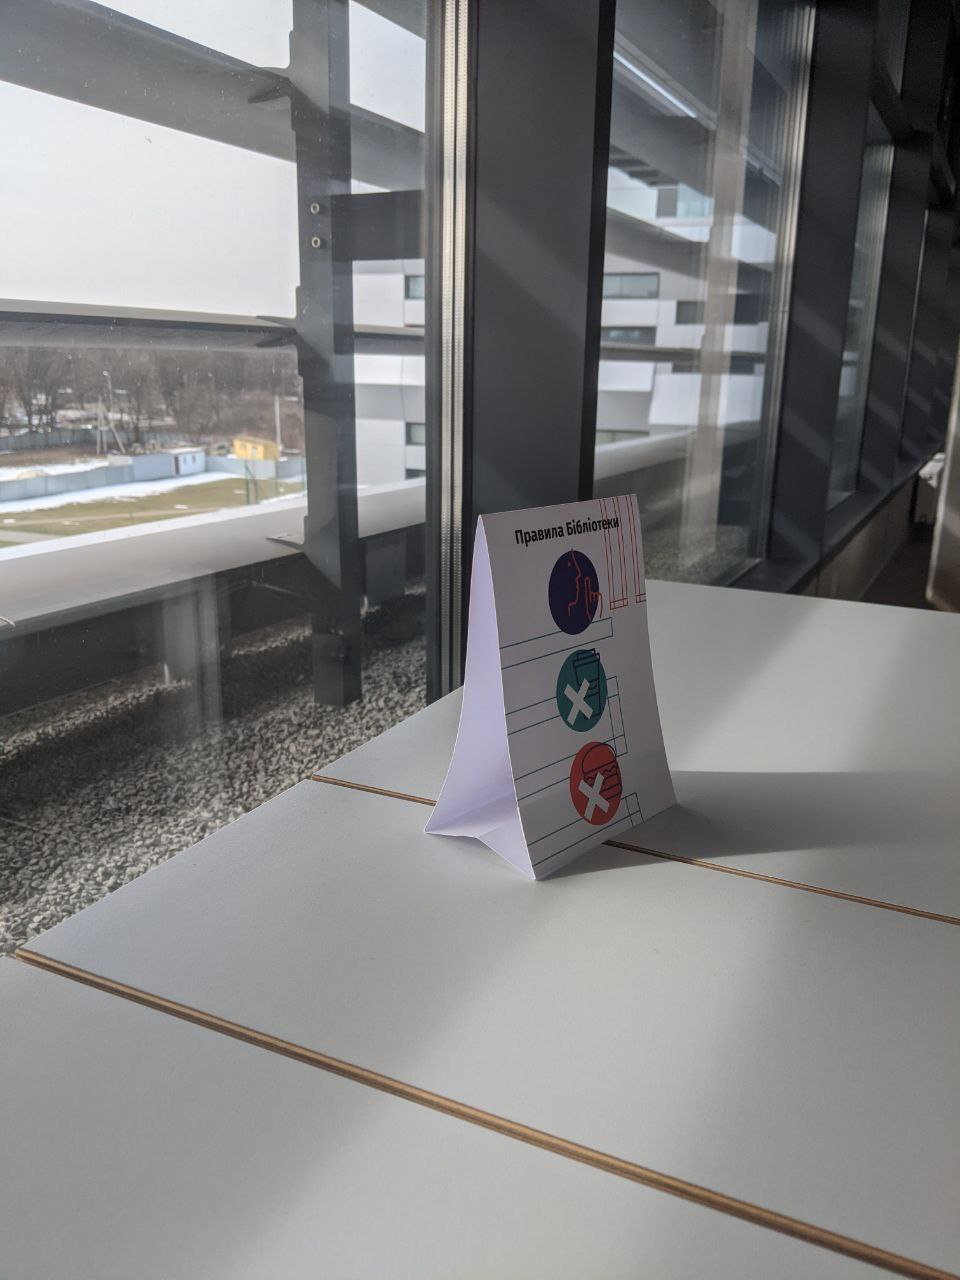

In [52]:
img2_path = '/content/drive/MyDrive/Media/Photos/img2.jpg'
img2 = cv.imread(img2_path)

print(f"The shape of the image is {img2.shape}")
cv2_imshow(img2)

Implement the function that constructs a perspective shift matrix and apply it to the image.

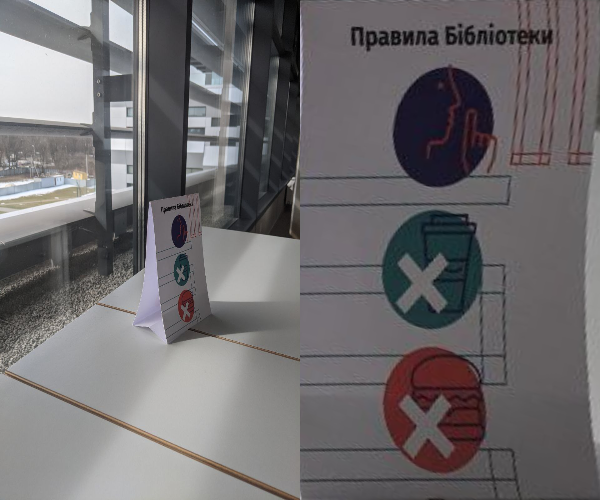

In [53]:
##### YOUR CODE STARTS #####
def get_perspective_transform_matrix(source, destination):
    assert len(source) >= 4
    assert len(destination) >= 4
    assert len(source) == len(destination)
    A = []
    b = []
    for i in range(len(source)):
        s_x, s_y = source[i]
        d_x, d_y = destination[i]
        A.append([s_x, s_y, 1, 0, 0, 0, (-d_x)*(s_x), (-d_x)*(s_y)])
        A.append([0, 0, 0, s_x, s_y, 1, (-d_y)*(s_x), (-d_y)*(s_y)])
        b += [d_x, d_y]
    A = np.array(A)
    res = np.linalg.lstsq(A, b, rcond=None)[0]
    res = np.concatenate((res, [1]), axis=-1)
    return np.reshape(res, (3, 3))

source_points = np.float32([(535, 879), (676, 804), (636, 495), (481, 514)])
destination_points = np.float32([(0, 1280), (960, 1280), (960, 0), (0, 0)])

perspective_shift_m = get_perspective_transform_matrix(source_points, destination_points)

transformed = cv.warpPerspective(img2, perspective_shift_m, (960, 1280), flags=cv.INTER_LINEAR)

vis = np.concatenate((img2, transformed), axis=1)
vis = cv.resize(vis, (600, 500))
cv2_imshow(vis)

##### YOUR CODE ENDS #####

### 2.2 Composition of transformations

Apply the following transformations to the original image in the specified order and observe the results displayed side-by-side.

1) Scaling by $(1.5, 2)$, rotation by $18^\circ$ and translation by $(10, 15)$.  
2) Translation by $(10, 15)$, scaling by $(1.5, 2)$, rotation by $18^\circ$.

---------------------------
Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)
---------------------------


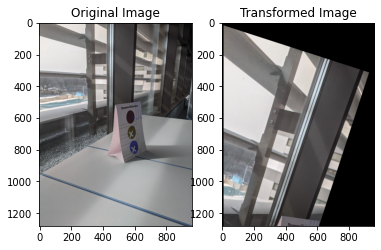

---------------------------
Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘
---------------------------


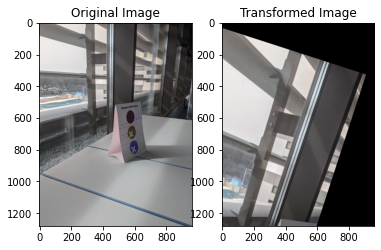

In [54]:
print("---------------------------")
print("Scaling by  (1.5,2) , rotation by  18∘  and translation by  (10,15)")
print("---------------------------")

##### YOUR CODE STARTS #####

# First transformation: scaling, rotation, and translation
scale_matrix = get_scaling_matrix_3d(1.5, 2)
rotate_matrix = np.column_stack((get_rotation_matrix(18), [0., 0.]))
translate_matrix = get_translation_matrix(10, 15)[:2]

rows, cols, channels = img2.shape
transformed = cv.warpAffine(img2, scale_matrix, (cols, rows))
transformed = cv.warpAffine(transformed, rotate_matrix, (cols, rows))
transformed = cv.warpAffine(transformed, translate_matrix, (cols, rows))

# Display the original and transformed images side by side
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(transformed)
plt.title("Transformed Image")
plt.show()


##### YOUR CODE ENDS #####

print("---------------------------")
print("Translation by  (10,15) , scaling by  (1.5,2) , rotation by  18∘")
print("---------------------------")

##### YOUR CODE STARTS #####

rows, cols, channels = img2.shape
transformed2 = cv.warpAffine(img2, translate_matrix, (cols, rows))
transformed2 = cv.warpAffine(transformed2, scale_matrix, (cols, rows))
transformed2 = cv.warpAffine(transformed2, rotate_matrix, (cols, rows))

# Display the original and transformed images side by side
plt.subplot(1, 2, 1)
plt.imshow(img2)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(transformed2)
plt.title("Transformed Image")
plt.show()

##### YOUR CODE ENDS #####

Do the outputs coincide? Is it possible to obtain same/different result changing the order of transformations? Which conditions should be met?

The outputs of the two sequences of transformations are different.  
  
The order of transformations matters because each transformation is performed relative to the original coordinate system, and subsequent transformations are performed relative to the new coordinate system produced by the previous transformation. The order of transformations affects the final result because each transformation changes the coordinate system of the image, which can affect how subsequent transformations are applied.

The order of transformations can be changed if the transformations commute with each other, that is, if the order of applying the transformations doesn't matter. For example, scaling and rotation transformations commute with each other, which means that applying them in any order will result in the same output. On the other hand, scaling and translation transformations don't commute with each other, which means that changing their order will result in different outputs.

## Summary

### Task1
Throughout this work, we have explored different concepts and techniques related to image transformations using OpenCV and NumPy. We practiced the basics of geometric transformations, including rotation, scaling, shearing, translation, and mirror symmetry. For each type of transformation, we learned how to construct the corresponding transformation matrix and how to apply it to vectors and images.

### Task2
We've learned to apply perspective-changing transformations and how they work. We've used this kind of transformation to achive the image with a more distinct text on it than on the original image.  
We also covered the topic of composition of transformations, where we applied multiple transformations in a specific order to an image and observed the effects of the order of transformations. We learned that the order of transformations matters most of the times, and changing the order can result in different outcomes.

### What is a transformation matrix?
A transformation matrix is a mathematical tool used to represent transformations in space, such as rotations, translations, scaling, and shearing. It is a square matrix that can be used to transform a vector or point from one coordinate system to another.

### How its shape and values affect the resulting image? What is a shape of a typical transformation matrix that is applied to images; which factors affect its shape?

The shape of a transformation matrix determines the type of transformation that is applied to the image, while the values of the matrix determine the degree and direction of the transformation.

In image processing, a typical transformation matrix used for affine transformations (i.e., transformations that preserve parallel lines) is a 3x3 matrix. This matrix includes elements that represent translations, rotations, and scaling factors.

Factors that affect the shape of a transformation matrix used in image processing include the type of transformation required, the degree and direction of the transformation, and the dimensions of the image being transformed.

### What can be a result of composition of transformations?

The result of the composition of transformations is a single transformation that is equivalent to applying all of the individual transformations in the sequence. In general, it depends on the order in which the individual transformations are applied, as well as the parameters of each individual transformation.

### What is a perspective shift transformation in terms of geometry?

A perspective shift transformation involves the projection of points and lines from a three-dimensional space onto a two-dimensional plane.

In a perspective shift transformation, parallel lines in 3D space do not necessarily remain parallel after the projection onto the 2D plane. This can result in distortion of the image, particularly near the edges of the image.